# Plottare con Pandas

In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  


dataset = load_dataset("yiqing111/Engineering_Jobs_Insight_Dataset")
df = dataset['train'].to_pandas()
df.columns = df.columns.str.replace(' ', '_')
df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], errors='coerce')

Repo card metadata block was not found. Setting CardData to empty.


È possibile creare grafici anche utilizzando Pandas. Anche se è più comune usare una libreria dedicata come Matplotlib, Pandas può essere utilizzato per creare grafici. Questo è utile soprattutto per creare velocemente un grafico durante un’analisi.

Non ci concentreremo su questo durante il corso, ma è disponibile se vuoi esplorarlo.

Puoi approfondire l’argomento [qui](https://pandas.pydata.org/docs/user_guide/visualization.html).

## Tracciare una Series

In [4]:
job_counts = df['Job_Title'].value_counts()
job_counts = job_counts.head(6)
job_counts

Job_Title
Software Engineer                                                         311
Product Manager  Social app startup                                       282
Associate Product Manager  Social app startup                             277
2025 Virtual Summer Intern Program - Product Analyst Intern (Xome)        267
Real-Time Software Engineer                                               266
Data Science Internship (Remote Eligible) - Graduate Student Preferred    255
Name: count, dtype: int64

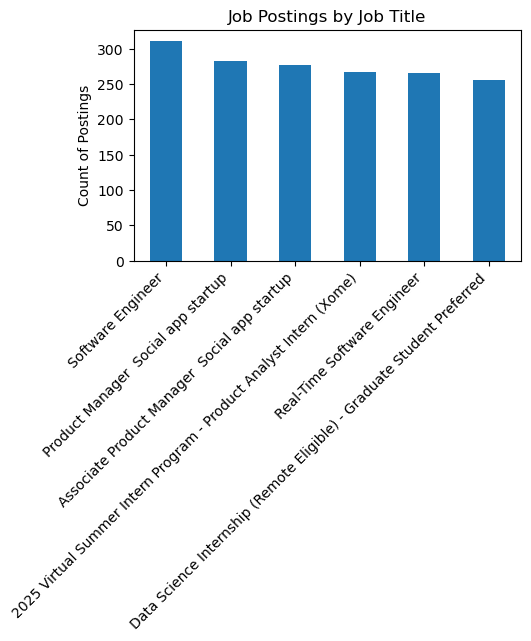

In [5]:
plt.figure(figsize=(5, 3))  # imposta una dimensione più compatta
job_counts.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Count of Postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right') 
plt.show()


## Plotting Dataframes

<Axes: xlabel='Date_Posted'>

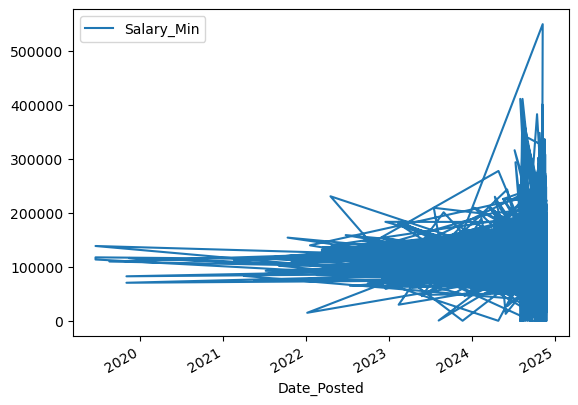

In [6]:
df.plot(x='Date_Posted', y='Salary_Min', kind='line')

Il problema con i DataFrame (soprattutto quelli di grandi dimensioni) è che i dati potrebbero comunque aver bisogno di essere ripuliti.


In [7]:
# sort index by job posted date 
df = df.set_index('Date_Posted')
df.sort_index(inplace=True)
df.head()

,Job_Title,Company,Description,Location,Salary_Min,Salary_Max,URL
Date_Posted,,,,,,,
2019-06-19 06:37:08+00:00,DevOps Engineer,Roy Talman & Associates,We are looking for a DevOps Engineer for our C...,"West Loop, Chicago",138781.27,138781.27,https://www.adzuna.com/details/1184897934?utm_...
2019-06-19 06:37:08+00:00,CryptoCurrency- Software Engineer,Roy Talman & Associates,Rapidly growing proprietary international trad...,"West Loop, Chicago",117745.63,117745.63,https://www.adzuna.com/details/1184897942?utm_...
2019-06-19 06:37:14+00:00,Backend Software Engineer,Roy Talman & Associates,"We are actively looking for a creative, talent...","Westmont, DuPage County",113766.23,113766.23,https://www.adzuna.com/details/1184898539?utm_...
2019-08-19 12:37:21+00:00,Embedded Software Engineer – Sensors – Electri...,Avanti,Why is This a Great Opportunity? We are lookin...,US,110000.00,120000.00,https://www.adzuna.com/details/1239116098?utm_...
2019-11-02 10:55:02+00:00,Business Analyst in New York eg,ESR Healthcare,"Business Analyst in New York eg New York, NY J...","New York City, New York",70637.84,70637.84,https://www.adzuna.com/details/1322665486?utm_...


<Axes: xlabel='Date_Posted'>

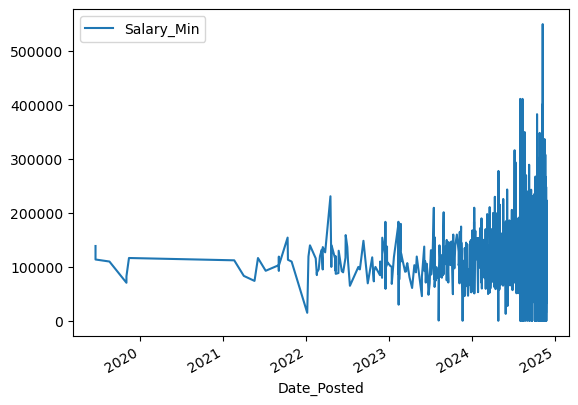

In [8]:
df.plot(y='Salary_Min', kind='line')

<Axes: xlabel='Date_Posted'>

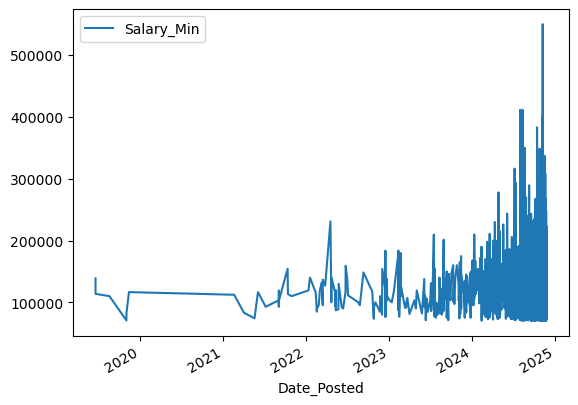

In [18]:
df = df[df['Salary_Min'] > 100]
df.plot(y='Salary_Min', kind='line')